# Image theresholding 
goal 
in this tutorial yoy will learn simple thresholding , Adaptive thresholding, Otsu's thresholding etc.
you will learn these functions:cv2.threshold, cv2.adaptiveThreshold etc

# Simple Thresholding
Here the matter is straight forward. If pixel value is greater than a threshold vlaue , it is assigned one value(may be white ) , else it is assigned another value(may ber black) . The function used is cv2.threshold . First argument is the source images, which should be a grayscale image . Second arguemt is the threshold balue which is used to classify the pixel value. Third argument is the maxVal which represents the value to be given if pixel value is more than (sometimes less than) the threshold value . OpenCV provides different styles of thresholding and it is decided by the fourth parameter of the function . Different types are :
@. cv2.THRESH_BINARY
@. cv2.THRESH_BINARY_INV
@. cv2.THRESH_TRUNC
@. cv2.THRESH_TOZERO 
@. cv2.THRESH_TOZERO_INV

Documentation clearly explain what each type is meant for. Please check out the documentation .
Two outputs are obtained. First one is a retval which will be explained later. Secind output is our threshold image 


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [10]:
img=cv2.imread('a.jpg',0)
ret,thresh1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3=cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4=cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5=cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles=['Original Image','Binary', 'Binary_inv','Trunc','Tozero','Tozero_inv']
images=[img,thresh1,thresh2,thresh3,thresh4,thresh5]




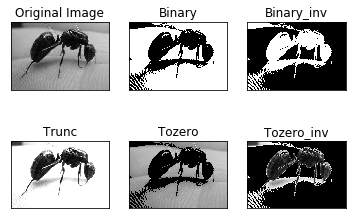

In [11]:
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()


# daptive Thresholding 
In the previous section, we used a globalvalue as threshold value. But it may not be good in all the conditions where image has different lightening conditions in different areas. In that case we go for adapative thresholding . In this , the algorithm calulate the threshold for a small regions fo the image . So we get different thresholds for diffrent retions of the same image and it gives us better results for images with varying illuminations.

it has three 'special' iput parameters and only one outpjt arguments.


# Adaptive Method - It decodes how thresholding value is caluclated.

> cv2.ADAPTIVE_THRESH_MEAN_C: Threshold value is the mean of neighbourhood area.
>cv2.ADAPTIVE_THRESH_GAUSSIAN_C : Threshold value is the weighted sum of neighbourhood values where weights are  a gaussian window.

Block Size :- It decides the size of neighbourhood area.

C:- It is just a constant which is subtracted from the mean or weighted mean calculated.
Below piece of code compares global thresholding and adaptive thresholding for an image with varying illuminations.


In [29]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

In [30]:
img=cv2.imread('a.jpg',0)
img= cv2.medianBlur(img,5)


In [32]:
ret,th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                          cv2.THRESH_BINARY,11,2)
th3=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                          cv2.THRESH_BINARY,7,7)
titles=['original image','Global Thresholding (V=127)','Adaptive Mean Thresholding','Adaptive Gaussian Thresholding']
images=[img,th1,th2,th3]


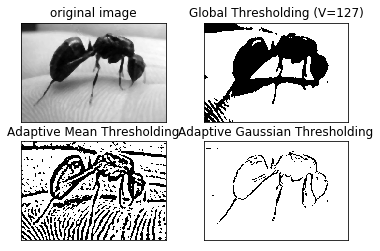

In [33]:
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


# Otsu's Binarization 
In the first seciton ,I told you there is a second parameter retVal . Its use comes when we go for Otsu's Binarization. So what is it?
In global thresholding , we used an arbitrary value for threshold value , right?

So , how can we know a value we selected is a good or not? Answer is , trial and error method . But consider a bimodal image(In simple words, bimodal image is an image whose histogram has two peaks). For that image , we can apporximately take a value in the middlie of those peaks as threshold value, right?

That is what OTsu binarization does. So in simple words, it automatically calcluates a threshold value from image histogram for a bimodal image. ( for images which are not bimodal, binarization won't be accurate)

For this , our cv2.threshold() function is used but pass an extra flag,
cv2.THRESH_OTSU. For threshold value , simply pass zero, Then the algorithm ginds the optimal threshold value and returns you as the second output . If Otsu thresholding is not used, retVal is same as the threshold vaule you used.

Chech out the below example . Input image is a noisy image. In first case, I applied global thresholding for value of 127 . I second case , I applied Otsu's thresholding directly. In third case , I filtered image with a 5x5 gaussian kernel to remove the noise then applied Utsu thresholding. See how noise filtering improves.


In [44]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt


In [45]:
img= cv2.imread('a.jpg',0)
ret1, th1=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret2,tg2= cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
blur=cv2.GaussianBlur(img,(5,5),0)
ret3,th3=cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

                      

In [53]:
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram',"Otsu's Thresholding",
          'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]


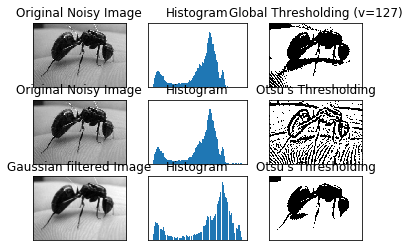

In [54]:
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()
